# Checking OLS

In [1]:
import statsmodels.api as sm
import numpy as np
import LinearModel as lm

size = 2000
cols = 3
eta = 1



def make_datasets(size, cols, num_zero=0, beta_scale=1., intercept=1., eta=1., seed=1):
    np.random.seed(seed)
    
    X = np.random.normal(loc=0, scale=1, size=(size,cols))
    beta = np.random.normal(loc=0, scale=beta_scale, size=cols)
    
    if num_zero != 0.:
        beta_indices = np.arange(0, beta.shape[0], 1)
        zero_indices = np.random.choice(beta_indices, num_zero, replace=False)
        beta[zero_indices] = 0
    
    y = intercept + np.matmul(X, beta) + np.random.normal(loc=0, 
                                                          scale=eta, 
                                                          size=size) 
    X_train = X[:round(size/2),:]
    y_train = y[:round(size/2)]  
    X_test = X[round(size/2):,:]
    y_test = y[round(size/2):] 
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=1, beta_scale=1., eta=1)
 


# Create an array of 1s equal in length to the observations in X.
intercept_column = np.repeat(1, repeats=X_train.shape[0])
# Insert it at the 0-th column index.
X_copy = np.insert(X_train, 0, intercept_column, axis=1)
        
        
sm_model = sm.OLS(y_train, X_copy).fit()
print(sm_model.summary())       
        

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     2994.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:59:26   Log-Likelihood:                -1399.1
No. Observations:                1000   AIC:                             2806.
Df Residuals:                     996   BIC:                             2826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9893      0.031     31.833      0.0

In [2]:
my_ols = lm.OLS()
my_ols.fit(X_train, y_train)  

print(f"Model df: {my_ols.df_model}")
print(my_ols.df_residuals)
print(my_ols.R_sq)
print(my_ols.adj_R_sq)
print(my_ols.F_stat)
print(my_ols.F_prob)
print(my_ols.beta_hat)
print(my_ols.beta_hat_se)
print(my_ols.beta_hat_t_stats)
print(my_ols.beta_hat_prob)

Model df: 3
996
0.900178569554503
0.8998779025953298
2993.939114660091
1.1102230246251565e-16
[ 0.9892585  -2.8302736   0.78860668 -0.03500686]
[0.03107643 0.03152934 0.03042002 0.03186712]
[ 31.83307862 -89.76634795  25.92393353  -1.09852617]
[0.         0.         0.         0.27224027]


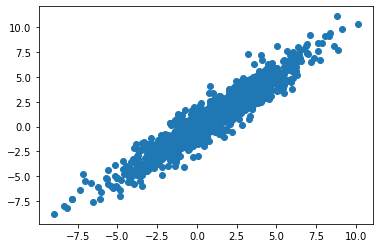

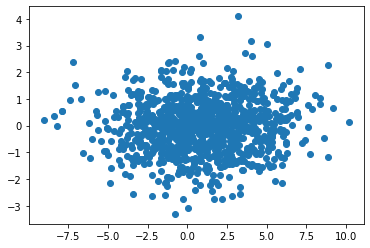

In [3]:
import matplotlib.pyplot as plt

plt.scatter(my_ols.predict(X_test), y_test)
plt.show()
plt.scatter(my_ols.predict(X_test), y_test-my_ols.predict(X_test))
plt.show()

# Ridge

In [4]:
my_ridge = lm.Ridge()
alpha = 10
my_ridge.fit(X_train, y_train, alpha=alpha) 

print(my_ridge.beta_hat)
print(my_ridge.R_sq)

[-2.76461474  0.79976418 -0.03404417]
0.9000945890311375


In [5]:
from sklearn.linear_model import Ridge

sklearn_ridge = Ridge(alpha=alpha, fit_intercept=True, normalize=False, solver='svd')

X_std = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_std_test = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

sklearn_ridge.fit(X_std, y_train)

sklearn_rsq = 1-np.sum((y_train-sklearn_ridge.predict(X_std))**2)/np.sum((y_train - np.mean(y_train))**2)

print(sklearn_ridge.coef_)
print(sklearn_rsq)

[-2.76461474  0.79976418 -0.03404417]
0.9000945890311375


In [6]:
print(np.allclose(my_ridge.beta_hat, sklearn_ridge.coef_))

True


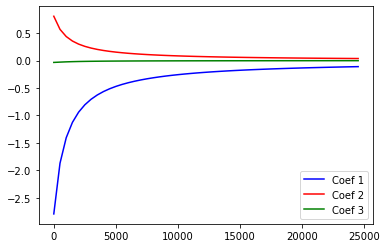

In [7]:
coef_1 = []
coef_2 = []
coef_3 = []
alphas = np.arange(0., 25000., 500)
for alpha in alphas:
    my_ridge = lm.Ridge()
    my_ridge.fit(X_train, y_train, alpha=alpha) 

    for i in range(len(my_ridge.beta_hat)):
        beta_hat = my_ridge.beta_hat[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        else:
            coef_3.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.legend(loc="lower right")
plt.show()

In [8]:
type(alpha)

numpy.float64

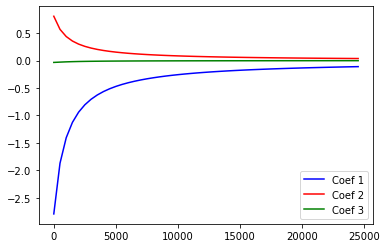

In [9]:
coef_1 = []
coef_2 = []
coef_3 = []
alphas = np.arange(0, 25000, 500)
for alpha in alphas:
    sklearn_ridge = Ridge(alpha=alpha, fit_intercept=True, normalize=False, solver='svd')
    sklearn_ridge.fit(X_std, y_train)  
    for i in range(len(sklearn_ridge.coef_)):
        beta_hat = sklearn_ridge.coef_[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        else:
            coef_3.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.legend(loc="lower right")
plt.show()

In [18]:
cols = 500
eta = 1

X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=250, beta_scale=0.2, eta=1)

X_std = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_std_test = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

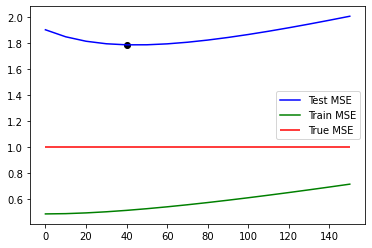

In [20]:
mse = []
train_mse = []
alphas = np.arange(0, 150+1, 10)
for alpha in alphas:
    my_ridge = lm.Ridge()
    my_ridge.fit(X_train, y_train, alpha=alpha) 
    training_mse = np.mean((y_train - my_ridge.predict(X_train))**2)
    train_mse.append(training_mse)
    test_mse = np.mean((y_test - my_ridge.predict(X_test))**2)
    mse.append(test_mse)

plt.plot(alphas, mse, color="blue", label="Test MSE")
plt.plot(alphas, train_mse, color="green", label="Train MSE")
plt.hlines(y=eta, xmin=np.min(alphas), xmax=np.max(alphas), color="red", label="True MSE")
plt.scatter(alphas[np.argmin(mse)], mse[np.argmin(mse)], color="black")
plt.legend(loc="best")
plt.show()

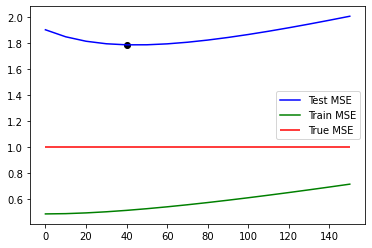

In [21]:
mse = []
train_mse = []

for alpha in alphas:
    sklearn_ridge = Ridge(alpha=alpha, fit_intercept=True, normalize=False, solver='svd')
    sklearn_ridge.fit(X_std, y_train)  
    training_mse = np.mean((y_train - sklearn_ridge.predict(X_std))**2)
    train_mse.append(training_mse)
    test_mse = np.mean((y_test - sklearn_ridge.predict(X_std_test))**2)
    mse.append(test_mse)

plt.plot(alphas, mse, color="blue", label="Test MSE")
plt.plot(alphas, train_mse, color="green", label="Train MSE")
plt.hlines(y=eta, xmin=np.min(alphas), xmax=np.max(alphas), color="red", label="True MSE")
plt.scatter(alphas[np.argmin(mse)], mse[np.argmin(mse)], color="black")
plt.legend(loc="best")
plt.show()